<a href="https://colab.research.google.com/github/ToonMath/Bachelor_Master_projects/blob/main/Scientific_computing_set_3_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse.linalg
import time

def getroundmatrix(X, Y, h, center, radius):
    shape = (int(round(X/h)), int(round(Y/h)))
    radius = radius/h
    centerindex = int(round(center[0]/h)), int(round(center[1]/h))
    coordindexmap = {}
    indexcoordmap = []
    index = 0
    for i in range(shape[0]):
        diffx = abs(i - centerindex[0])
        for j in range(shape[1]):
            diffy = abs(j - centerindex[1])
            if diffx**2 + diffy**2 < radius**2:
                coordindexmap[(i, j)] = index
                indexcoordmap.append((i, j))
                index += 1

    matrix = np.zeros((index, index))
    # fill matrix
    for i in range(index):
        vector = np.zeros((index,))
        x, y = indexcoordmap[i]
        neighbours = (x,y+1), (x,y-1),(x+1,y),(x-1,y)
        for neighbour in neighbours:
            if neighbour in coordindexmap:
                neighbourindex = coordindexmap[neighbour]
                vector[neighbourindex] += 1/h**2
        vector[i] -= 4/h**2
        matrix[:,i] = vector
    return matrix, shape, indexcoordmap, coordindexmap


Text(0, 0.5, 'y')

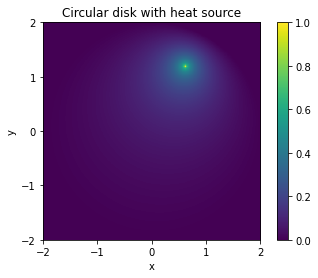

In [ ]:
from scipy.sparse import csr_matrix, linalg

h = .025

matrix, shape, indexcoordmap, coordindexmap = getroundmatrix(4,4,h,(2,2), 2)

source = (2-1.2, 2.6) # our cordinate system is a bit different
sourcecoord = (int(round(source[0]/h)), int(round(source[1]/h)))
sourceindex = coordindexmap[sourcecoord]

matrix[sourceindex, :] = 0
matrix[sourceindex,sourceindex] = 1
matrix = csr_matrix(matrix)

vector = np.zeros((len(indexcoordmap),))
vector[sourceindex] = 1

sol = scipy.sparse.linalg.spsolve(matrix, vector)
# transform indexes back to grid
grid = np.zeros(shape)
for i in range(len(indexcoordmap)):
    x,y = indexcoordmap[i]
    grid[x,y] = sol[i]

plt.imshow(grid, extent=[-2,2,-2,2])
plt.yticks([-2,-1,0,1,2])
plt.colorbar()
plt.title("Circular disk with heat source")
plt.xlabel("x")
plt.ylabel("y")

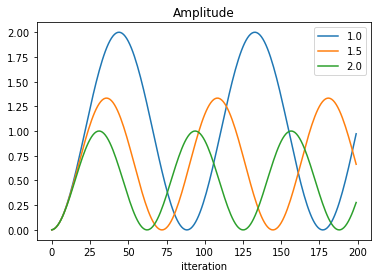

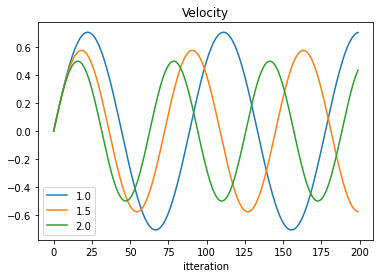

In [ ]:
#Leap frog method
import numpy as np
import matplotlib.pyplot as plt
tend = 20
m = 1
N = 100
L = 1
g = 10
#inital position and force
x_max = 1
v_initial = 0
dt = 10/N
t=np.arange(0,tend,dt)
def frogleap(k):
  v = np.zeros(len(t))
  x = np.zeros(len(t))
  v_half = np.zeros(len(t))
  a=np.zeros(len(t))
  for i in range(len(t)-1):
    a[i] = 1-k*x[i]/m
    v[i+1] = v[i]+0.5*(a[i]+a[i+1])*dt
    v_half[i+1] = v[i]+0.5*a[i]*dt
    x[i+1] = dt*v[i]+0.5*a[i]*dt**2+x[i]
    
    t[i] = t[i-1]+dt
  
  return x,v

k = np.arange(1,2.5,0.5)
for j in range(len(k)):
  position,velocity = frogleap(k[j])
  plt.figure(0)
  plt.plot(position,label=str(k[j]))
  plt.title('Amplitude')
  plt.xlabel('itteration')
  plt.legend()
  plt.figure(1)
  plt.plot(velocity,label = str(k[j]))
  plt.title('Velocity')
  plt.xlabel('itteration')
  plt.legend()
plt.figure(0).savefig('frogleap_amp.png')
plt.figure(1).savefig('frogleap_vel.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

(10, 10)
200
200
200


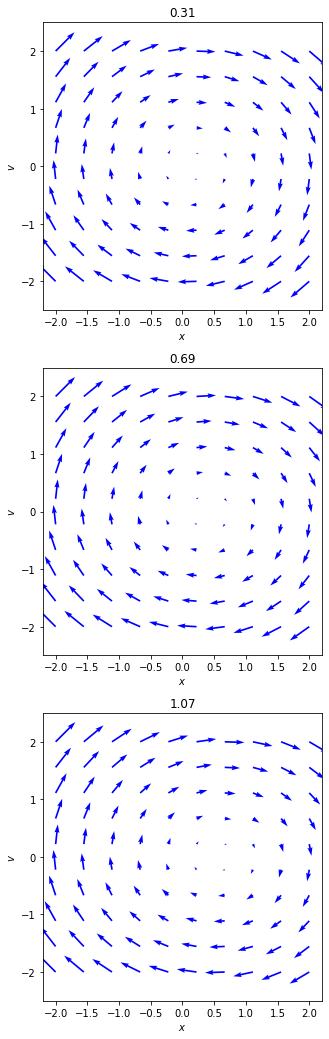

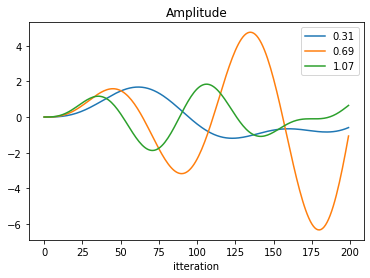

In [ ]:
#frogleap plus sinusodal driving force
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tend = 20
m = 1
N = 100
dt = 10/N
L = 1
dx = L/N-1
g = 10
#inital position, velocity and spring constant
k = 1

def frogleap_2(k,omega):
  t=np.arange(0,tend,dt)
  v = np.zeros(len(t))
  x = np.zeros(len(t))
  a = np.zeros(len(t))
  v_half = np.zeros(len(t))
  y = np.sin(omega*t)
  print(len(y))
  for i in range(len(t)-1):
    a[i] = (y[i]-k*x[i])/m
    v[i+1] = v[i]+0.5*(a[i]+a[i+1])*dt
    v_half[i+1] = v[i]+0.5*a[i]*dt
    x[i+1] = dt*v[i]+0.5*a[i]*dt**2+x[i]
  return x,v

def x_derivative(X,omega,k,t):
    x1, x2 = X
    return [x2, np.sin(omega*t)-k*x1]




x1 = np.linspace(-2.0, 2.0, 10)
x2 = np.linspace(-2.0, 2.0, 10)

X1, X2 = np.meshgrid(x1, x2)

u, w = np.zeros(X1.shape), np.zeros(X2.shape)
print(w.shape)

NI, NJ = X1.shape
omega = np.arange(0.05,0.2,0.06)*2*np.pi 
t=np.arange(0,tend,dt)
fig, axs = plt.subplots(len(omega),1,figsize=(5,18))
for z in range(len(omega)):
  for i in range(NI):
    for j in range(NJ):
        x = X1[i, j]
        y = X2[i, j]
        xprime = x_derivative([x, y], omega[z],k,t[j])
        u[i,j] = xprime[0]
        w[i,j] = xprime[1]
  Q = axs[z].quiver(X1, X2, u, w, color='b')
  axs[z].set_xlabel('$x$')
  axs[z].set_ylabel('$v$')
  axs[z].set_xlim([-2.2,2.2])
  axs[z].set_ylim([-2.5,2.5])
  axs[z].set_title(str(round(omega[z],2)))
  filename = 'phase_diagram_omega_'+str(round(omega[z],2))+'.png'
  plt.savefig(filename)  
      
for j in range(len(omega)):
    position,velocity = frogleap_2(k,omega[j])
    plt.figure(0)
    label = str(round(omega[j],2))
    plt.plot(position,label = label)
    plt.title('Amplitude')
    plt.xlabel('itteration')
    plt.legend()
plt.savefig('frogleap_2_amp.png')




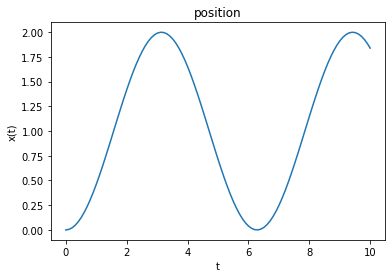

In [ ]:
#RK45 solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

k=1
m=1
L=1
def ode_oscillator(t,x):
  return [x[1], 1-k*x[0]/m]
x0 =[0,0]
t_span = [0,10]

sol = solve_ivp(ode_oscillator,t_span,x0,method='RK45',max_step=0.1,dense_output=True)
plt.plot(sol.t,sol.y[0])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('position')
plt.savefig('RK45.png')